# ⚠️ À lire attentivement – À propos des exercices et l'examen

Les exercices proposés pendant les sessions ont pour objectif principal de renforcer votre compréhension des notions abordées en cours. Pour cela, l’intégralité du code vous sera fournie : vous n’aurez donc pas à programmer vous-mêmes, mais à lire, analyser et comprendre les scripts. À partir de ce code, vous devrez accomplir des tâches précises et répondre par écrit à des questions de compréhension. L’idée est de vous guider pas à pas dans l’analyse tout en développant votre capacité à expliquer ce que vous observez.

#### TO DISCUSS/COMPLETE
À la fin de chaque session, vous pourrez soit nous remettre une feuille manuscrite, soit nous envoyer un PDF de vos réponses (via Moodle ou par email, à confirmer) au plus tard le mardi suivant. Une correction vous sera ensuite communiquée la semaine d’après.


## Données de séquence pour étudier les mutations cancéreuses

Pendant le cours, vous avez appris comment, dans le séquençage à haut débit, les lectures ("reads") sont mappées sur le génome humain. Nous allons maintenant effectuer un calcul simple pour estimer le nombre d'opérations nécessaires pour cet alignement. Ici, nous nous concentrons uniquement sur les exons ([https://en.wikipedia.org/wiki/Exome_sequencing]). Si nous incluons également les introns, le nombre d'opérations serait bien plus élevé. Pourquoi ?

Le génome humain contient environ 20 000 gènes codants, chacun composé de plusieurs exons. Supposons que la longueur totale des exons par gène soit de 1 000 nucléotides. Quelle est la longueur totale du génome de référence en ne considérant que les exons ?

**Question 1 - à faire par écrit)** Combien d'opérations approximatives sont nécessaires pour mapper un seul "read" ? Et combien d'opérations pour mapper 10^6 "reads" (le résultat typique d'une machine à haut débit) ?

Pour information, la longueur d'un "read" dépend de la technologie de séquençage. La longueur typique pour le séquençage Illumina (l'une des plus utilisées dans le monde) est d'environ 80 paires de bases [80bp]. Sur un serveur moderne à haute performance avec plusieurs cœurs, l'ensemble du pipeline de séquençage de l'exome peut prendre entre 6 et 24 heures.



Voici à quoi ressemble la sortie d'une machine de séquençage (file *.fastq*). 

**Question 2 - à faire par écrit)** Pouvez-vous dire la signification de chaque ligne ? (https://en.wikipedia.org/wiki/FASTQ_format)

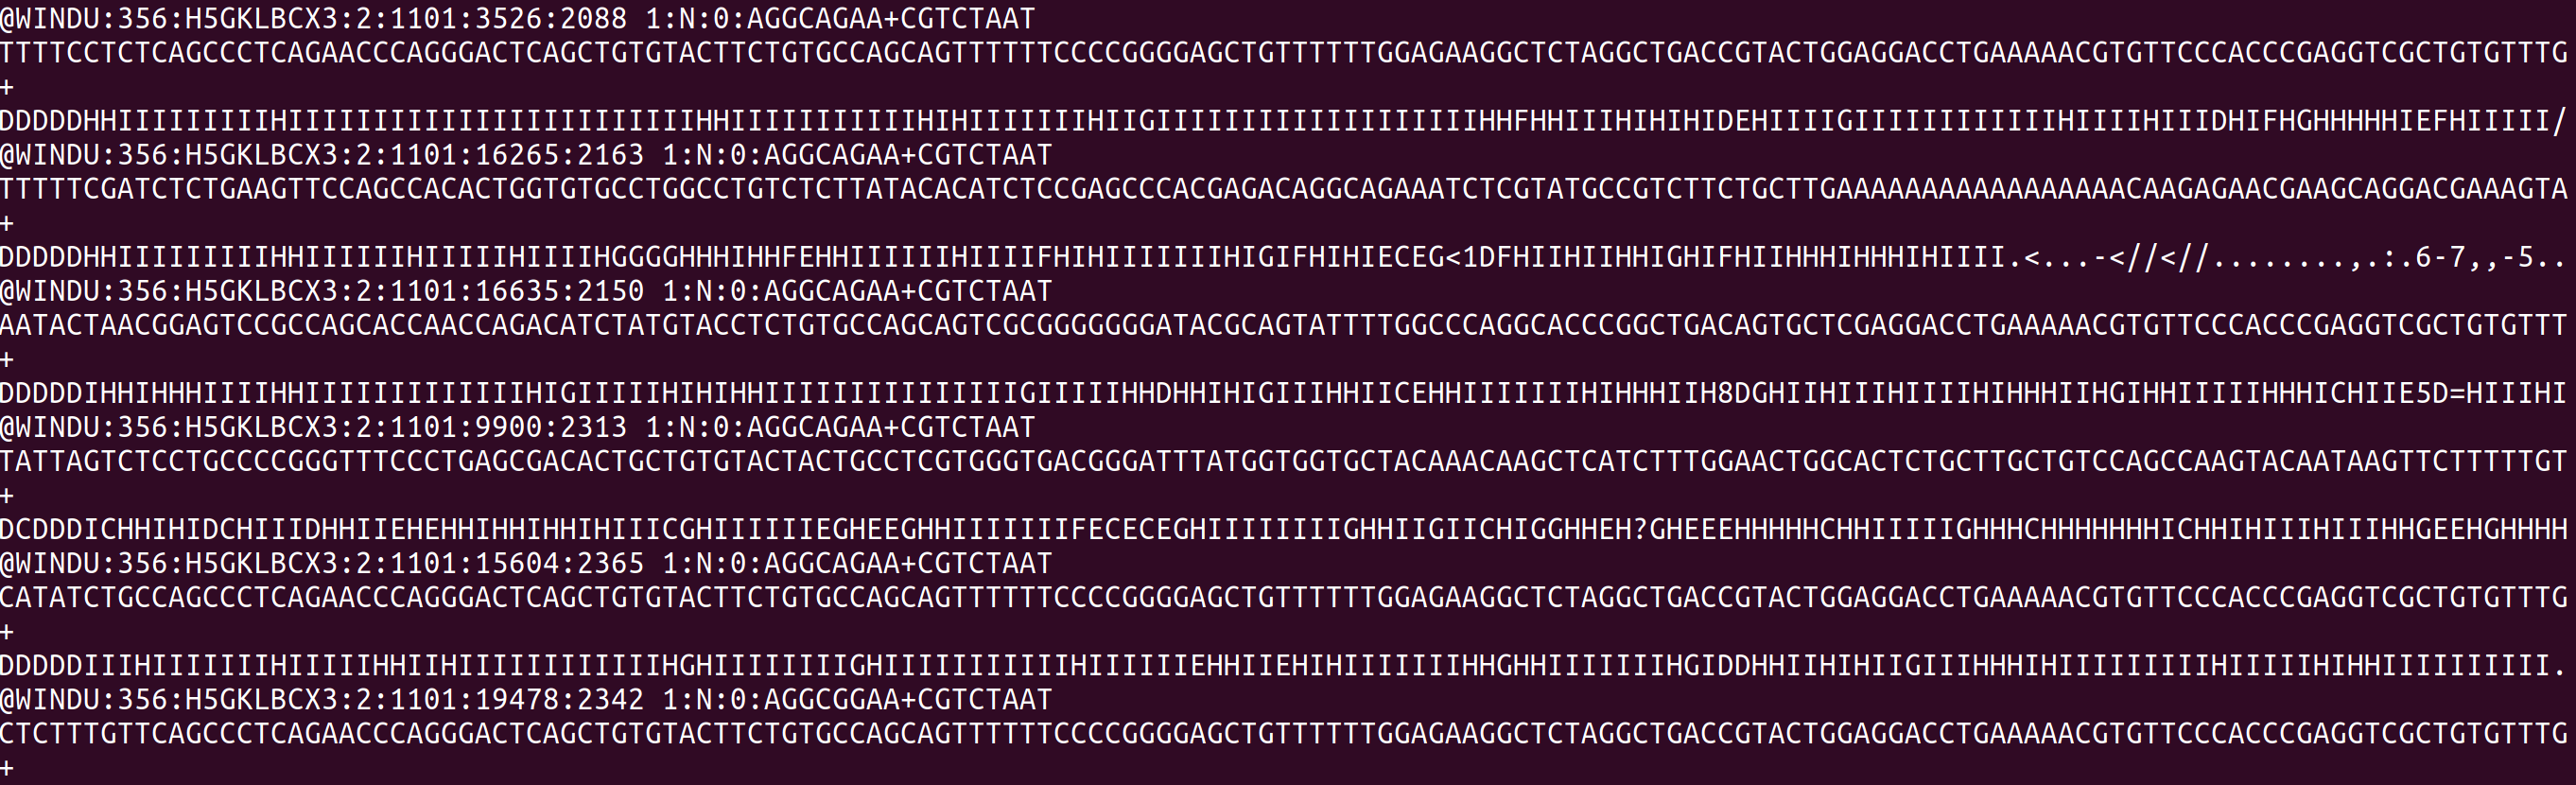

## Analyse des mutations du patient TCGA-D9-A1JX 


#### Update: TCGA released a new version on Sep 28, 2022
        7e6151f4-ec8b-4b8c-8676-00e1084f9db5 Current_Version 2022-09-28	
        97cf696c-5633-4fbd-9ed8-680599947dcc Version_1 2022-03-29

Dans ce tutorial, nous nous concentrerons sur les mutations potentiellement cancérogènes du patient TCGA-D9-A1JX. Nous avons téléchargé le fichier pour vous, mais pour mieux comprendre comment obtenir les données, suivez les étapes suivantes

**Bonus: The Cancer Genome Atlas (TCGA) - Comment télécharger les données des patients**

1. Accédez au site Web du TCGA (https://portal.gdc.cancer.gov/) et recherchez les données du patient TCGA-D9-A1JX. Cliquez sur "Files" en haut à droite. De nombreuses données sont disponibles pour ces patients. Expliquez-les brièvement.
2. Nous recherchons des fichiers *.maf*. Les fichiers *.maf* (Mutation Annotation Format) sont des fichiers qui contiennent des annotations de mutations somatiques et/ou germinales. Pour des raisons de confidentialité, les fichiers *.maf* contenant des annotations de mutations germinales sont protégés et distribués en accès contrôlé. Les fichiers *.maf* contenant uniquement des mutations somatiques sont accessibles au public (plus d'info  https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/)

3. Il n'y a qu'un seul fichier *.maf* accessible au public: 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf.gz 

3. Téléchargez-le et decompressez-le. Ouvrez le dossier et, encore une fois, decompressez le fichier 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf.gz
4. Placez le fichier 3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf dans 'Week2' de la page Jupyter.

Nous utiliserons python pour analyser ce fichier et effectuer une analyse statistique.

In [1]:
# Simple analysis with python
import pandas as pd                                                                                                                                                                                       
import plotly.express as px

df = pd.read_csv("./3af7eded-b4ae-4470-91bb-c62f1c787144.wxs.aliquot_ensemble_masked.maf", sep = '\t', comment = '#')  
print(df)
#Les fichiers contiennent de nombreuses colonnes (140). Essayez de comprendre lesquelles sont les plus importantes

    Hugo_Symbol  Entrez_Gene_Id Center NCBI_Build Chromosome  Start_Position  \
0        CDK11A          728642     BI     GRCh38       chr1         1703896   
1         HSPG2            3339     BI     GRCh38       chr1        21875655   
2       C1orf94           84970     BI     GRCh38       chr1        34212343   
3        CFAP57          149465     BI     GRCh38       chr1        43183645   
4       CYP4A11            1579     BI     GRCh38       chr1        46938008   
..          ...             ...    ...        ...        ...             ...   
205         MN1            4330     BI     GRCh38      chr22        27796797   
206       CRLF2           64109     BI     GRCh38       chrX         1202417   
207        TAB3          257397     BI     GRCh38       chrX        30831534   
208        HEPH            9843     BI     GRCh38       chrX        66255117   
209      MAGEE2          139599     BI     GRCh38       chrX        75784758   

     End_Position Strand Variant_Classi

**Tâche 3)** Quels sont les chromosomes les plus mutés ? (utilisez les fonctions value_counts() et px.bar() que nous avons vue la semaine dernière)

**Tâche 4)** Faites le même plot pour étudier de "Variant_Classification" et décrivez-le

**Tâche 5)** pouvez-vous faire un plot pour décrire en même temps sur quel chromosome et quel type de mutations a ce patient ? Utilisez px.bar et le label "color" que nous avons vue la semaine dernière

##  Missense mutations
**Question 6 - à faire par écrit)** Expliquez pourquoi les missense mutations sont potentiellement dangereuses. Et les mutations synonymes ?

Vous trouverez ici les mutations pour ce patient : https://portal.gdc.cancer.gov/cases/f505058f-74f2-4476-887f-06590a605980 (en bas de la page "MOST FREQUENT SOMATIC MUTATIONS")

Le patient a une mutation missense dans le gène BRAF. Vous devriez trouver : 

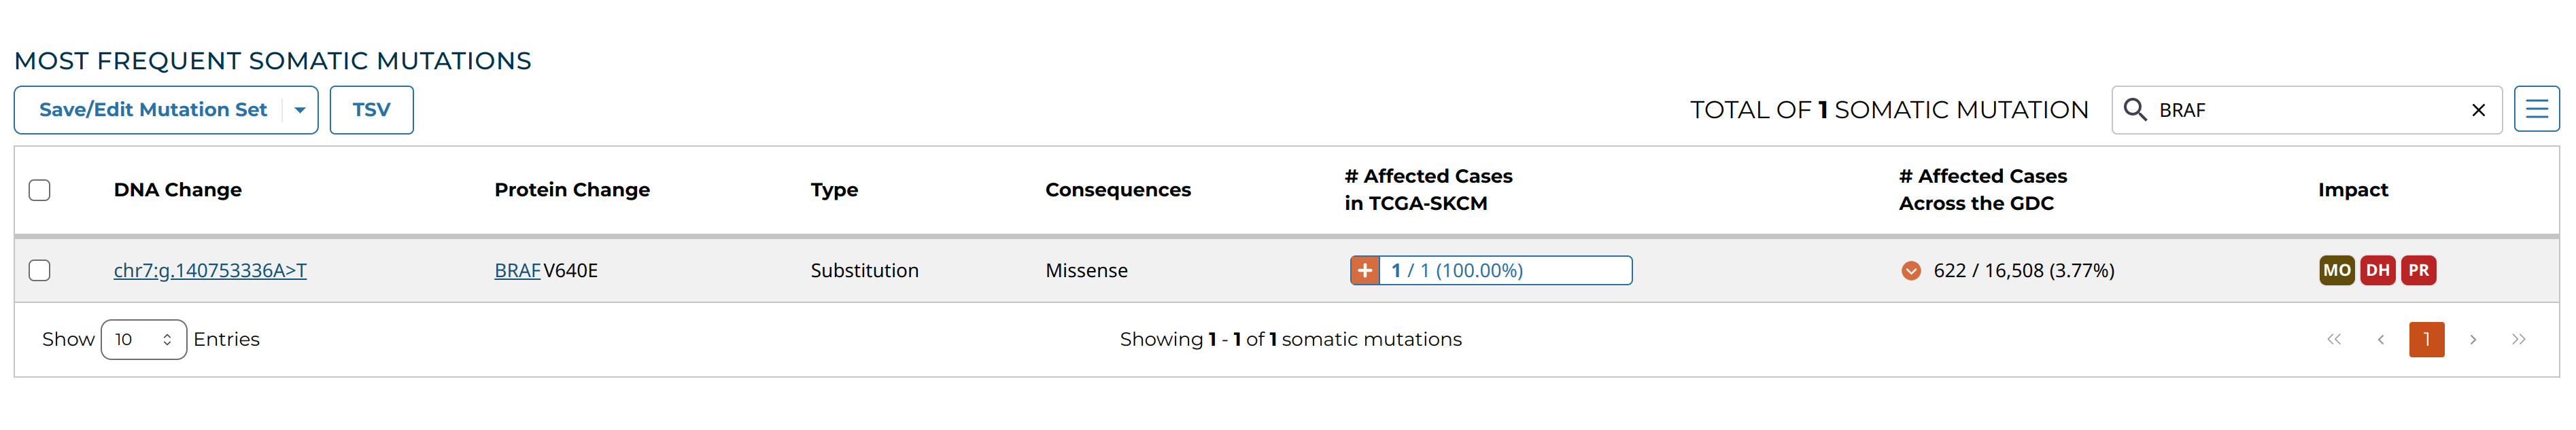

**Tâche 7)** Que signifie chr7 ? Et le nombre après ? Assurez-vous de comprendre chaque entrée. 
Vous avez vu ce gène et cette mutation dans la leçon, pouvez-vous vous rappeler pourquoi c'est important ?

**Question 8 - à faire par écrit)** Une mutation missense n'est pas nécessairement dangereuse! Si le même acide aminé a été observée chez d'autres espèces proches de l'Homo Sapiens, elle n'aura probablement pas d'impact sur la fonctionnalité de la protéine correspondante. Pourquoi? 

Pour vérifier cela, on peut utiliser la plus grande base de données mondiale de séquences de protéines, qui s'appelle Uniprot (https://www.uniprot.org/). Uniprot est une ressource très utile pour l'analyse de séquences (une courte description ici https://fr.wikipedia.org/wiki/UniProt). Si vous le souhaitez, n'hésitez pas à consulter les tutoriels (https://www.ebi.ac.uk/training/online/courses/uniprot-quick-tour/#vf-tabs__section--overview)


**Tâche 9)** Trouvez les gènes BRAF pour Homo sapiens dans Uniprot. Combien d'acides aminés il y a dans BRAF?  

## Comment identifier les mutations potentiellement dangereuses

### Nous nous concentrerons sur **BRAF** et étudierons mutations aux positions **640** et **313**.

Pour comprendre si le même acides aminé a été observé chez des espèces proches de l'Homo Sapiens il faut identifier les séquences dites homologues. Depuis UniProt, nous avons téléchargé la séquence du gène BRAF des espèces suivantes : Homo sapiens (https://www.uniprot.org/uniprotkb/P15056/), Mus musculus (https://www.uniprot.org/uniprotkb/P28028), Gallus gallus (https://www.uniprot.org/uniprotkb/Q04982) et Coturnix japonica (https://www.uniprot.org/uniprotkb/P34908).


Les séquences ont des longueurs différentes, il est donc nécessaire de les aligner. Veuillez copier les séquences et les coller à l'adresse suivante : https://www.ebi.ac.uk/jdispatcher/msa/clustalo. Cet outil vous permettra de générer un alignement de séquences.

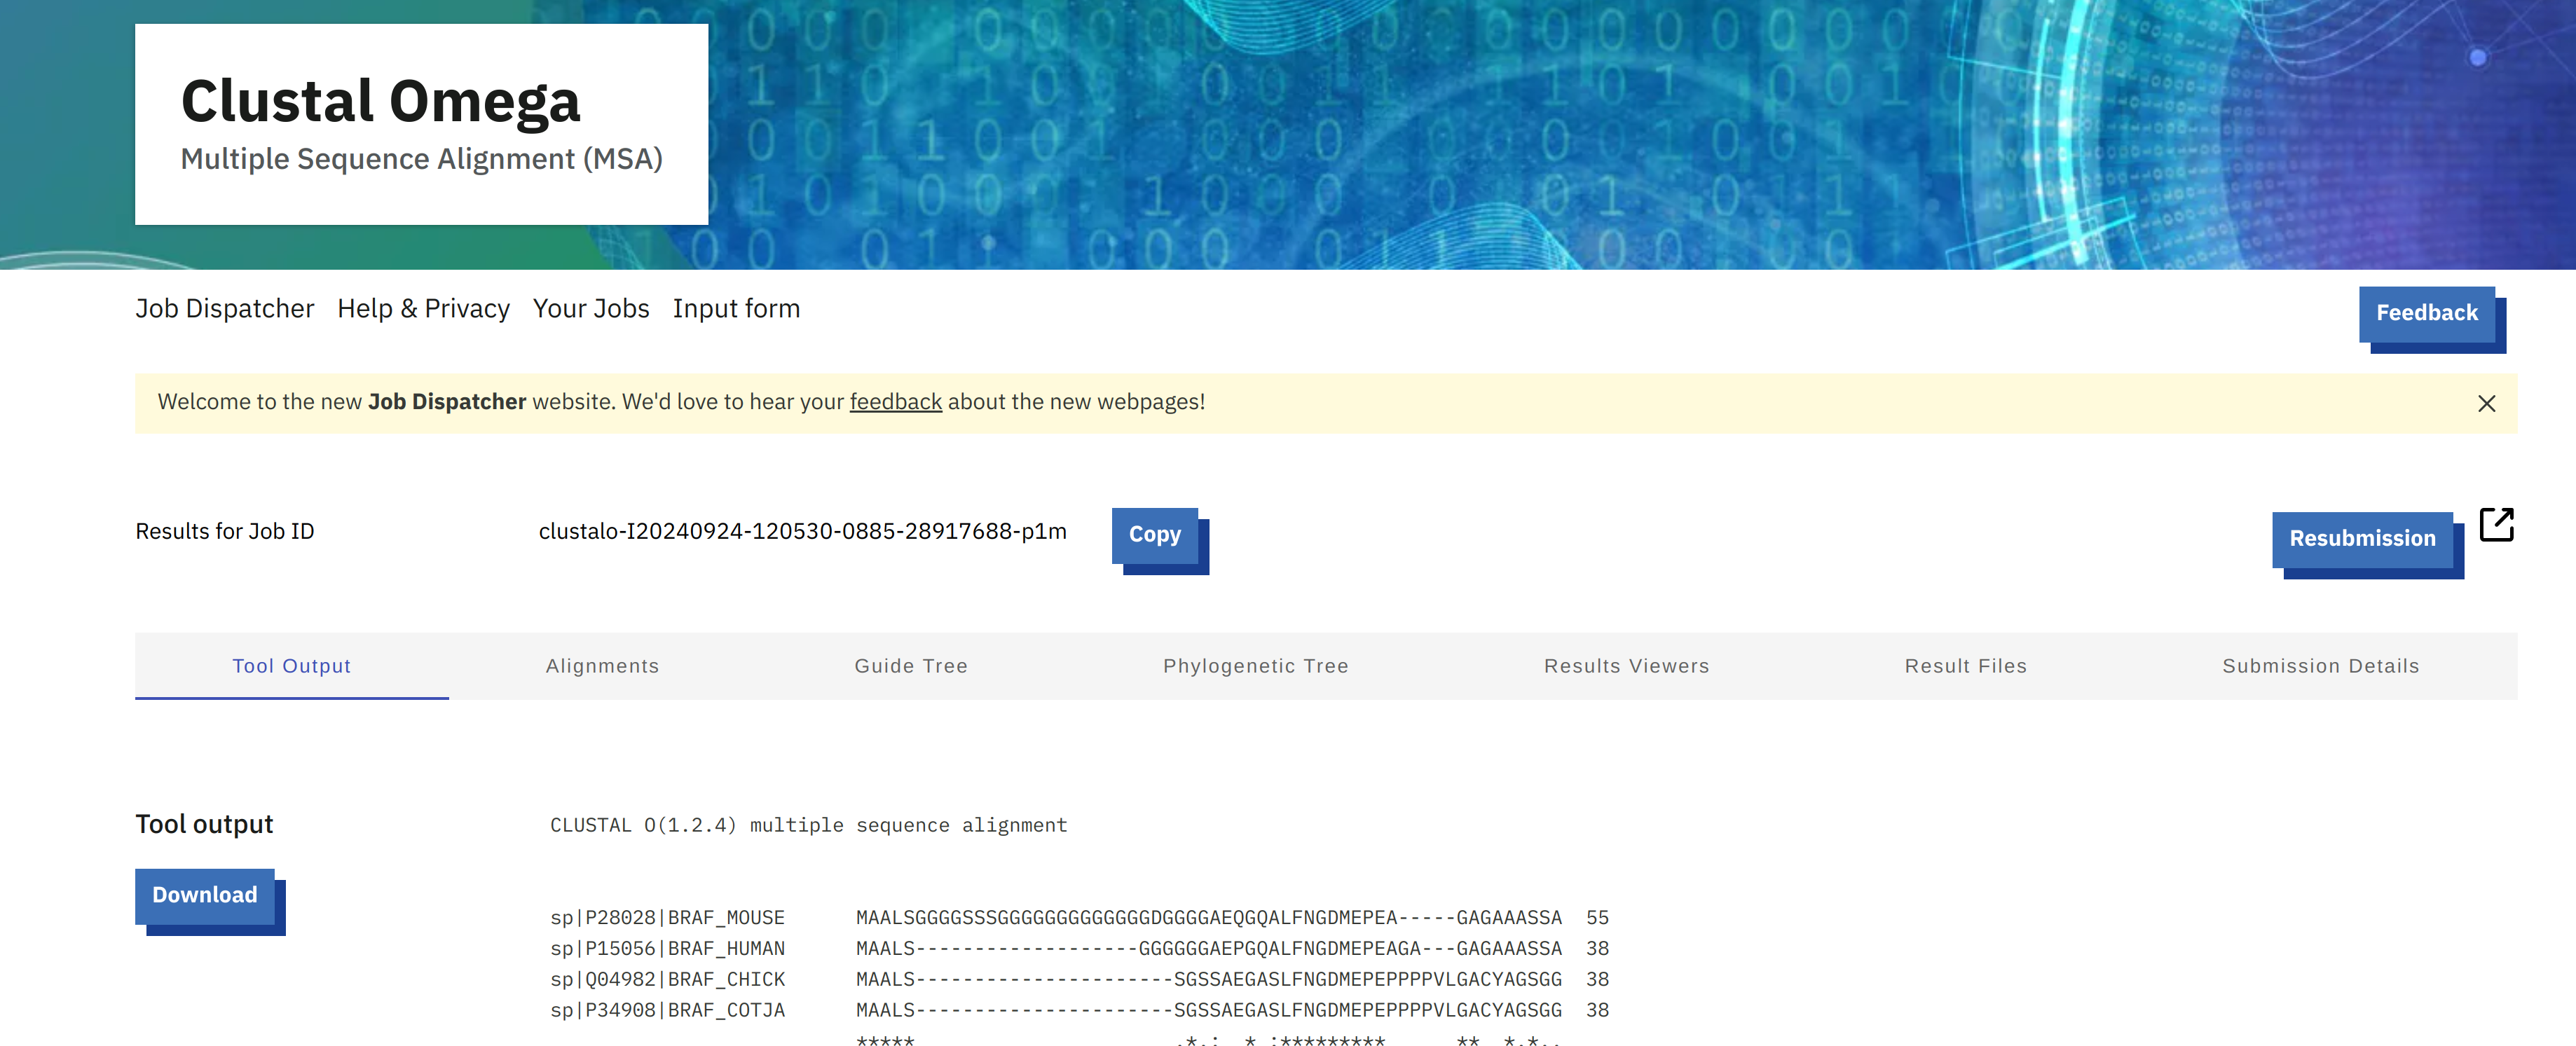

**Tâche 10)** Identifiez les acides aminés V à la position 640 et T à la position 313. Sont-ils conservés ou mutables dans les autres espèces ? Qu'en concluez-vous ?
Pour vous aider, voici les acides aminés environnants:
- GLAT**V**KSRWS (V640)
- ETAL**T**SGSS (T313)

Comme vous l'avez peut-être compris, la comparaison des mutations entre espèces est une méthode potentiellement puissante pour obtenir des informations sur le risque potentiel d'une mutation particulière. Pourtant, obtenir des résultats fiables est loin d'être trivial ! Les résultats peuvent dépendre des espèces que nous incluons dans notre analyse (c'est-à-dire de celles que nous considérons comme phylogénétiquement "proches" de l'Homo Sapiens), et il s'agit là d'un domaine de recherche encore actif. 

De nombreux prédicteurs ont été développés par des chercheurs pour accéder à l'impact prévu d'une mutation, et vous pouvez même en trouver certains sur TCGA. Si vous retournez à la page des mutations du patient TCGA-D9-A1JX : https://portal.gdc.cancer.gov/cases/f505058f-74f2-4476-887f-06590a605980 (en bas de la page), vous trouverez une colonne "Impact". Essayez de comprendre quelles informations elle contient. 
Certains prédicteurs utilisent une approche similaire à ce que vous venez de faire !

Il est clair que la conservation d'un résidu n'est pas le seul facteur qui détermine l'importance d'une mutation. Il faut aussi tenir compte de la "fréquence" d'une mutation. Si une mutation est partagée par de nombreux patients, il est plus probable qu'il s'agisse d'une mutation importante plutôt qu'une autre mutation observée une seule fois chez un seul patient ! Regardez la frequence de mutations (ficher .tsv). Laquelle est la plus commune ?

**Félicitations, vous avez terminé ce tutoriel avec succès !**